### Projeto 4 - ÁLgebra Linear e Matrizes Aleatórias

Integrantes:

***********************

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

**Questão 1. Matrizes Gaussianas.** Uma matriz gaussiana tem todas as entradas $A_{ij}$
independentes e distribuídas segundo uma normal padrão, ou seja, $A \sim \mathcal{N}(0, 1)$.

a) **Distribuição das normas.** Faça um histograma da norma-$2$ das colunas de uma matriz gaussiana $A$, $m \times n$. Use vários valores de $m$, e comente o que você observa.

*Solução:* Abaixo está o código para gerar os histogramas correspondentes à norma-2 de matrizes normais com $1000$ colunas e uma quantidade variável de linhas.


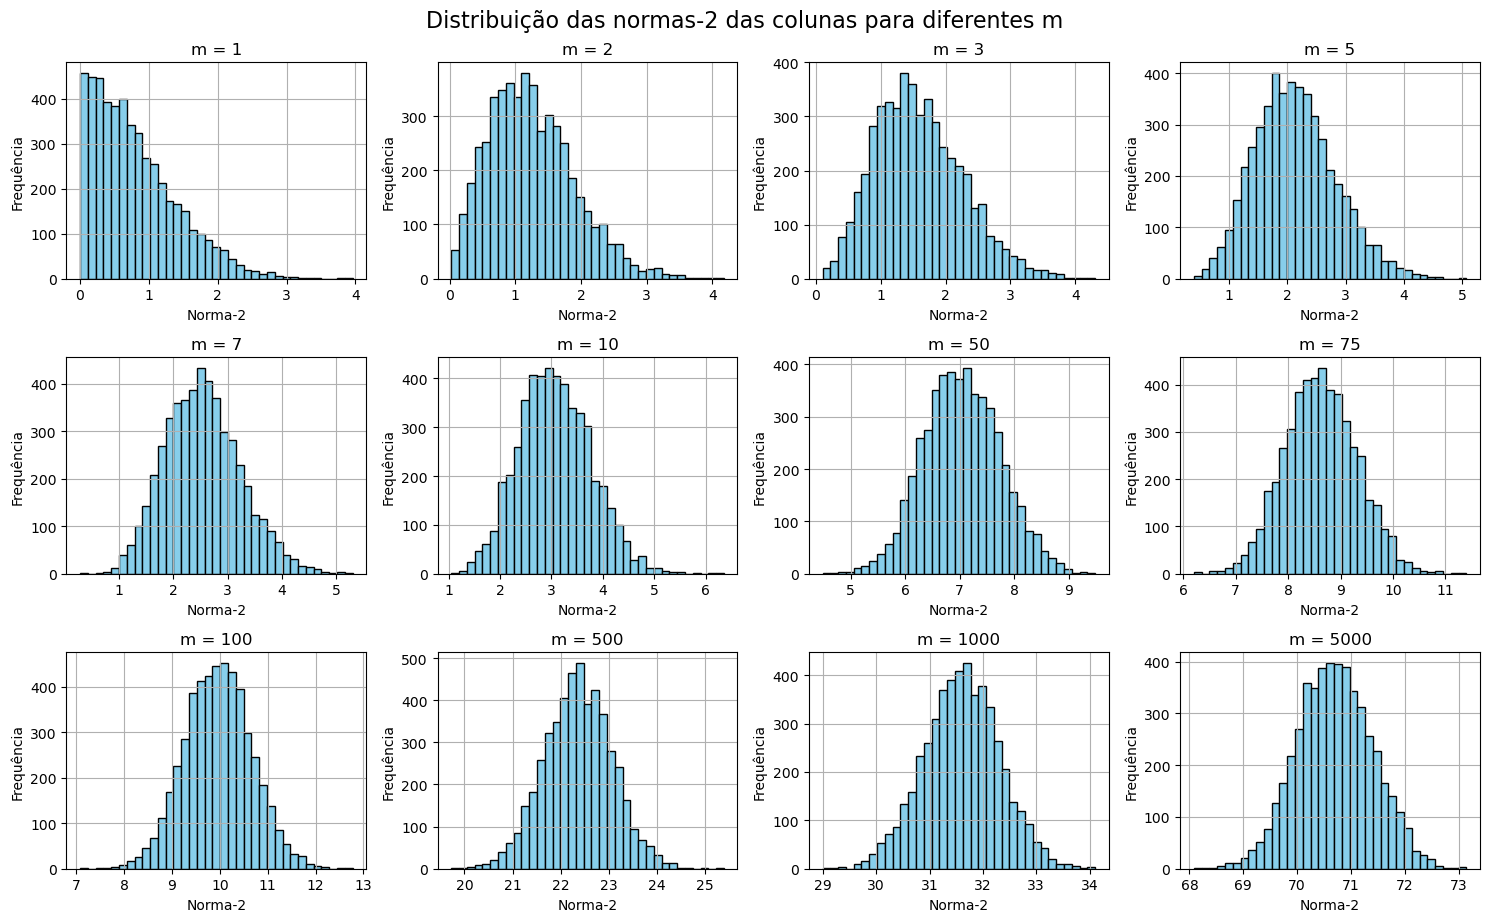

In [2]:
np.random.seed(1)

n = 5000  # n colunas
m_values = [1, 2, 3, 5, 7, 10, 50, 75, 100, 500, 1000, 5000]  # diferentes n de linhas

plt.figure(figsize=(15, 9))

for i, m in enumerate(m_values, 1):
    A = np.random.randn(m, n)  # matriz m x n a_ij ~ N(0,1)
    norms = np.linalg.norm(A, axis=0)  
    plt.subplot(3, 4, i)
    plt.hist(norms, bins=35, color='skyblue', edgecolor='black')
    plt.title(f'm = {m}')
    plt.xlabel('Norma-2')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Distribuição das normas-2 das colunas para diferentes m", fontsize=16, y=1.02)
plt.show()

Observa-se que, aumentando o número $m$ de linhas da matriz, o formato geral do histograma das normas das colunas das matrizes gaussianas vai se aproximando a uma distribuição normal. No caso extremo $m=1$, aparentamos enxergar como se fosse a metade direita de uma curva normal, menos acentuada. Isso se dá porque estamos calculando as normas de números entre 0 e 1. Nesse intervalo específico, quanto menor o número é, menor ainda será seu quadrado, por isso o acûmulo nos menores valores. Isso pode ser visto no gráfico da parabóla de $x^2$ nesse intervalo. 

Conforme $m$ aumenta, a média do histograma se desloca para a direita, até o momento que todo o histograma se move para a direita no eixo $x$ a partir de $m=7$. Calculando o valor esperado dessa média:

Seja $\vec{x} \in \mathbb{R}$ com $x_i \sim \mathcal{N} \ \forall i=1, 2, \dots, m \implies ||x||_2^2 = x_1^2 + x_2^2 + \dots + x_m^2 $ 

Como cada $x_i$ é uma variável aleatória (VA) normal padrão, $x_i^2$ é uma V.A. *Qui-Quadrado* com grau de liberdade 1 (??? NAO TENHO CERTEZA). A norma ao quadrado é a soma de $m$ dessas variáveis independentes e identicamente distribuídas (iid). Sabemos (da matéria Teoria da Probabilidade) pelo Teorema do Limite Central (TLC) que, quando $m$ é grande, a distribuição da soma (e de sua raiz quadrada) se aproxima de uma distribuição normal.

b) **Produtos internos.** Agora, fixe $m=100$ e faça o histograma do produto interno $\langle A_i, A_j \rangle$ entre as colunas de uma matriz gaussiana $A$. Exclua os casos $i=j$, e use $n=100, 200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n \rightarrow \infty$?

*Solução:* Fixando $m=100$ e variando o número de colunas, temos:

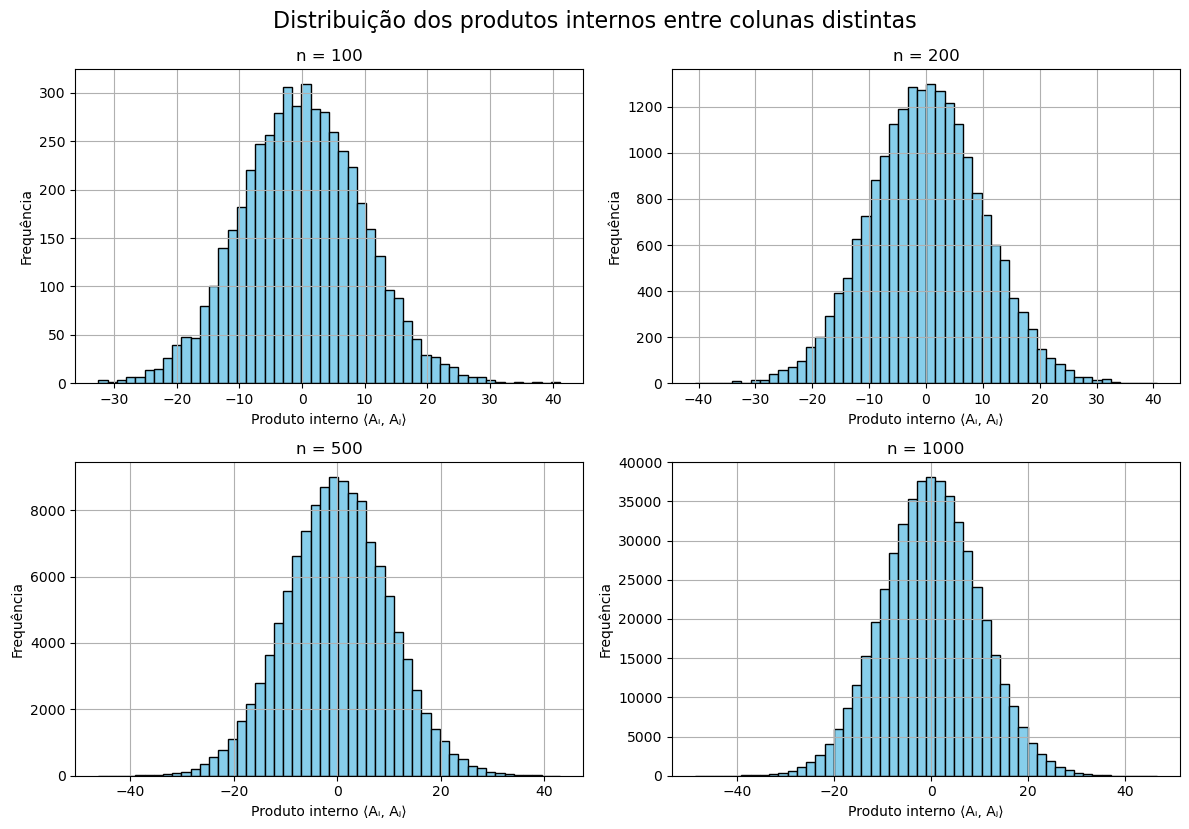

In [5]:
np.random.seed(0)

def dot_prod(A): 
    n = A.shape[1]
    dots = []
    for i in range(n):
        for j in range(i+1, n):
            dot = np.dot(A[:, i], A[:, j])
            dots.append(dot)
    return np.array(dots)

m = 100
n_values = [100, 200, 500, 1000]

plt.figure(figsize=(12, 8))

for i, n in enumerate(n_values, 1):
    A = np.random.randn(m, n)
    prods = dot_prod(A)

    plt.subplot(2, 2, i)
    plt.hist(prods, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'n = {n}')
    plt.xlabel('Produto interno ⟨Aᵢ, Aⱼ⟩')
    plt.ylabel('Frequência')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Distribuição dos produtos internos entre colunas distintas', fontsize=16, y=1.03)
plt.show()

c) **A distribuição do máximo.** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{|\langle A_i, A_j \rangle|}{||A_i||.||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isso, gere $K=1000$ matrizes gaussianas $A_k$ de ordem $100 \times 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

*Solução:* 

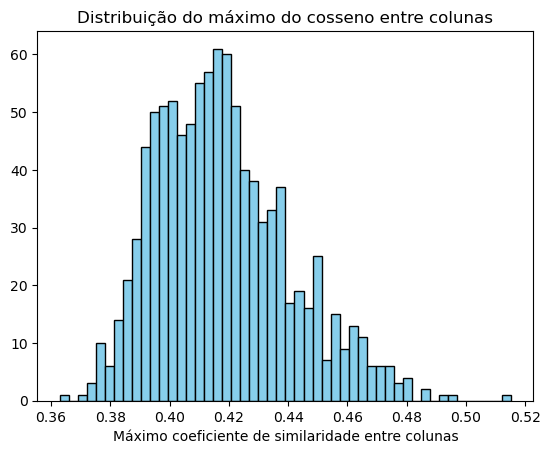

In [14]:
#função para retornar os valores |<Ai,Aj>|/||Ai||.||Aj||
np.random.seed(0)


def max_cos(A):
    n = A.shape[1]
    max_val = 0
    for i in range(n):
        for j in range(i + 1, n):
            dp = abs(np.dot(A[:, i], A[:, j]))
            norm_prod = np.linalg.norm(A[:, i]) * np.linalg.norm(A[:, j])
            val = dp / norm_prod
            if val > max_val:
                max_val = val
    return max_val

results = []

for _ in range(1000):
    A = np.random.randn(100, 300)
    max_sim = max_cos(A)
    results.append(max_sim)

plt.hist(results, bins=50, edgecolor='black',color='skyblue')
plt.title('Distribuição do máximo do cosseno entre colunas')
plt.xlabel('Máximo coeficiente de similaridade entre colunas')
plt.show()

d) **Complexidade computacional.** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

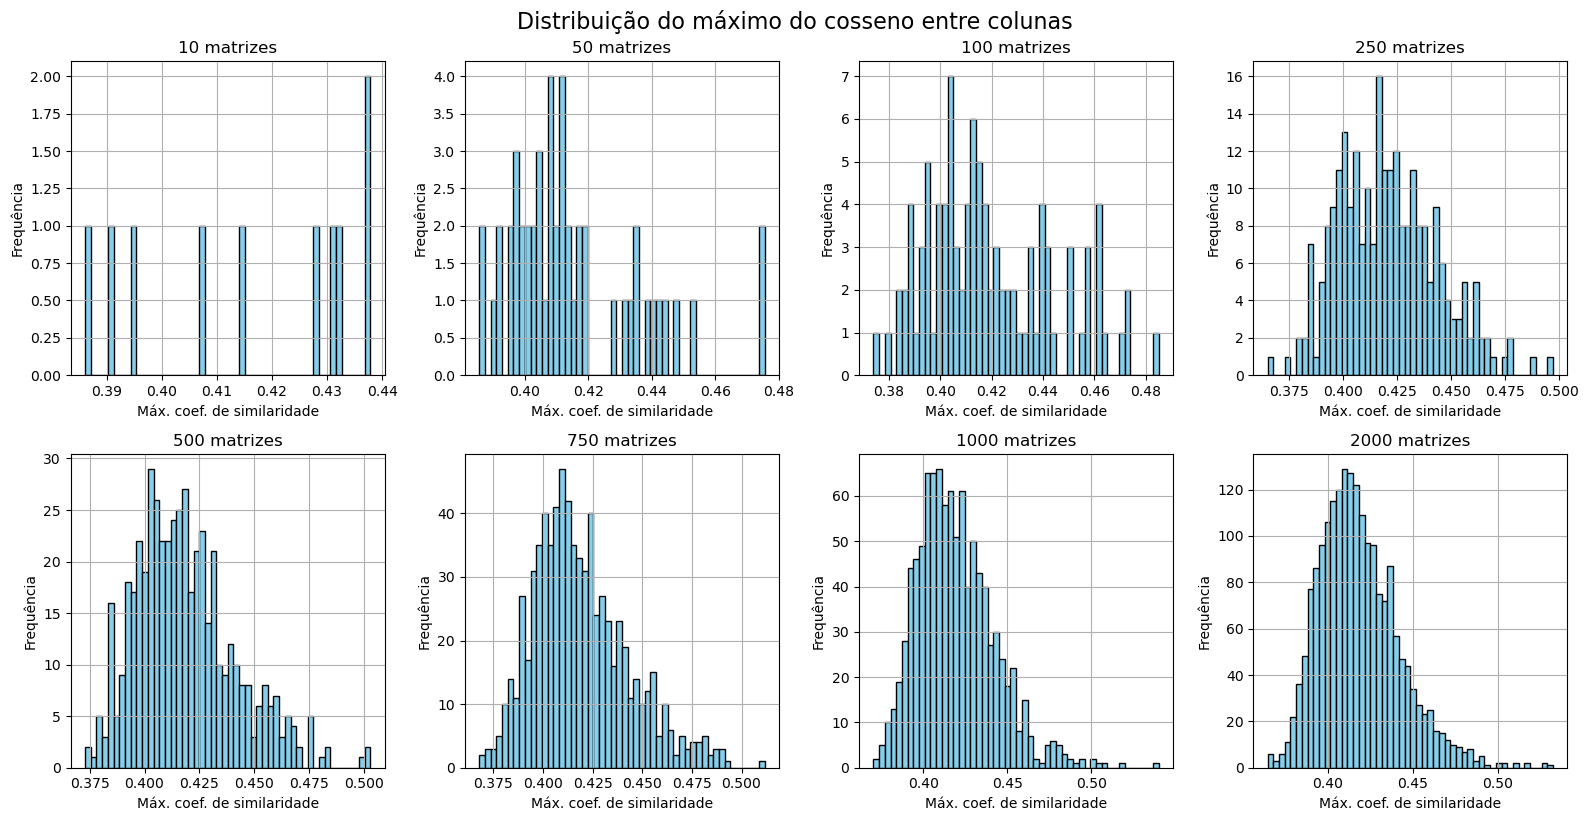

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, each in enumerate([10, 50, 100,250, 500, 750, 1000, 2000]):
    results = []
    for _ in range(each):
        A = np.random.randn(100, 300)
        max_sim = max_cos(A)
        results.append(max_sim)

    ax = axes[i // 4][i % 4]
    ax.hist(results, bins=50, edgecolor='black', color='skyblue')
    ax.set_title(f'{each} matrizes')
    ax.set_xlabel('Máx. coef. de similaridade')
    ax.set_ylabel('Frequência')
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Distribuição do máximo do cosseno entre colunas', fontsize=16, y=1.02)
plt.show()

e) **A distribuição do máximo, parte 2.** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m,n)$: $(100,100), (100, 300), (200, 200), (200, 600), (500,500), (500, 1500), (1000, 1000), (1000, 3000)$

In [1]:
k=750

values_of_mn = [(100, 100),(100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)]


fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, (m, n) in enumerate(values_of_mn):
    results = []
    for _ in range(k):
        A = np.random.randn(m, n)
        results.append(max_cos(A))

    ax = axes[i // 4][i % 4]
    ax.hist(results, bins=40, edgecolor='black', color='mediumslateblue', density=True)
    ax.set_title(f'm = {m}, n = {n}')
    ax.set_xlabel('Máx. coef. de similaridade')
    ax.set_ylabel('Densidade')
    ax.grid(True)


NameError: name 'plt' is not defined